In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-nwpf_hh_ because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [99]:
# !ls ../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/

In [2]:
file1 = uproot.open("../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/GenInfo_only_H_AA_4Tau_M3p7.root")
RHTree1 = file1["fevt/RHTree"]

file2 = uproot.open("../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/GenInfo_only_H_AA_4Tau_M6.root")
RHTree2 = file2["fevt/RHTree"]

file3 = uproot.open("../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/GenInfo_only_H_AA_4Tau_M10.root")
RHTree3 = file3["fevt/RHTree"]

file4 = uproot.open("../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/GenInfo_only_H_AA_4Tau_M14.root")
RHTree4 = file4["fevt/RHTree"]

In [4]:
# file.keys()
# RHTree.typenames()
RHTree1.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | uint64_t                 | AsDtype('>u8')
Run                  | uint32_t                 | AsDtype('>u4')
LumiSection          | uint32_t                 | AsDtype('>u4')
GenHiggs_inv         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
GenA1_inv            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
GenA2_inv            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
GenHiggs             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
GenA1                | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
GenA2                | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
dR_A1_A2             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
dR_H_A1              | std::vector<float>       | AsJagged(AsDtype('>f4'), h

In [56]:
# RHTree["a_m"].array()

In [57]:
# h_jet_Taudeta_phi = file["fevt/h_jet_Taudeta_phi"]
# h_jet_Taudeta_phi.to_hist()

In [58]:
# RHTree.show()

In [59]:
# dR_Tau1_Tau2=RHTree["dR_Tau1_Tau2"].array(library="pd")
# dR_Tau3_Tau4=RHTree["dR_Tau3_Tau4"].array(library="pd")

### dR Tau1 and Tau2

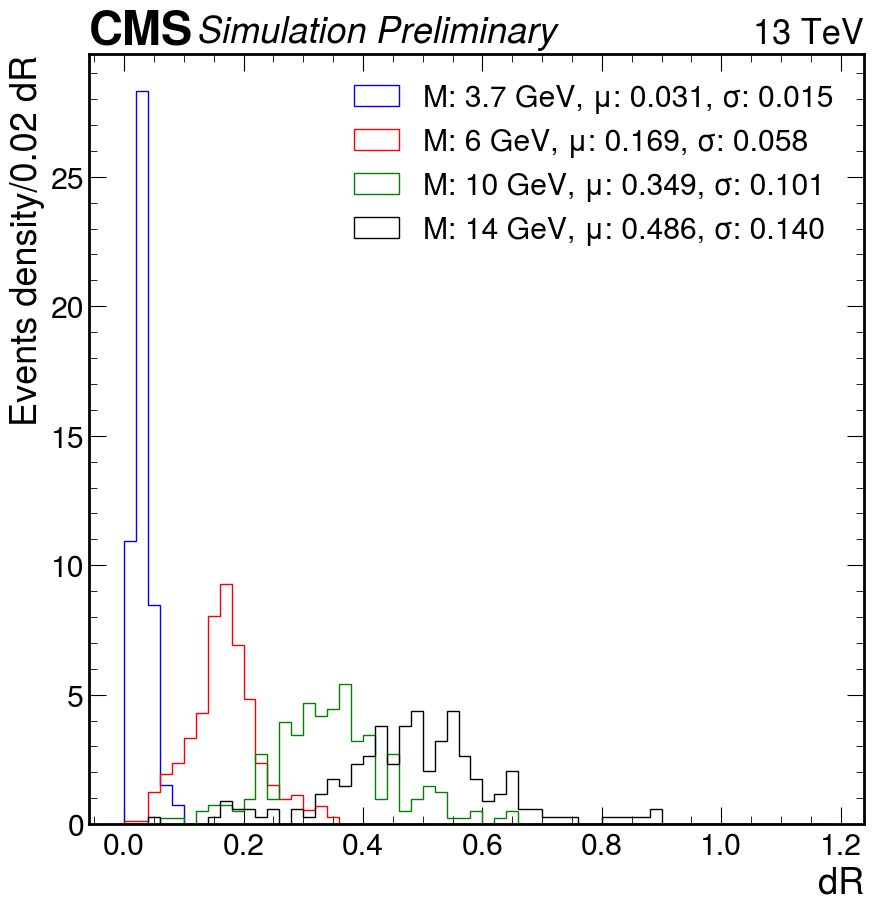

In [105]:
mu = '\u03BC'  # μ
sigma = '\u03C3'  # σ
bins = np.arange(0,1.2, 0.02)
dR_M3p7 = RHTree1.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_M6 = RHTree2.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_M10 = RHTree3.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_M14 = RHTree4.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
fig, ax = plt.subplots()
plt.hist(dR_M3p7,bins=bins,density=True, histtype='step',linestyle='-',linewidth=1, color='b',label=f"M: 3.7 GeV, {mu}: {np.mean(dR_M3p7):.3f}, {sigma}: {np.std(dR_M3p7):.3f}")
plt.hist(dR_M6,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='r',label=f"M: 6 GeV, {mu}: {np.mean(dR_M6):.3f}, {sigma}: {np.std(dR_M6):.3f}")
plt.hist(dR_M10,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='g',label=f"M: 10 GeV, {mu}: {np.mean(dR_M10):.3f}, {sigma}: {np.std(dR_M10):.3f}")
plt.hist(dR_M14,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='k',label=f"M: 14 GeV, {mu}: {np.mean(dR_M14):.3f}, {sigma}: {np.std(dR_M14):.3f}")
# plt.xticks(np.arange(0,1,.1))
plt.legend()
plt.ylabel("Events density/0.02 dR")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

### dR Tau3 and Tau4

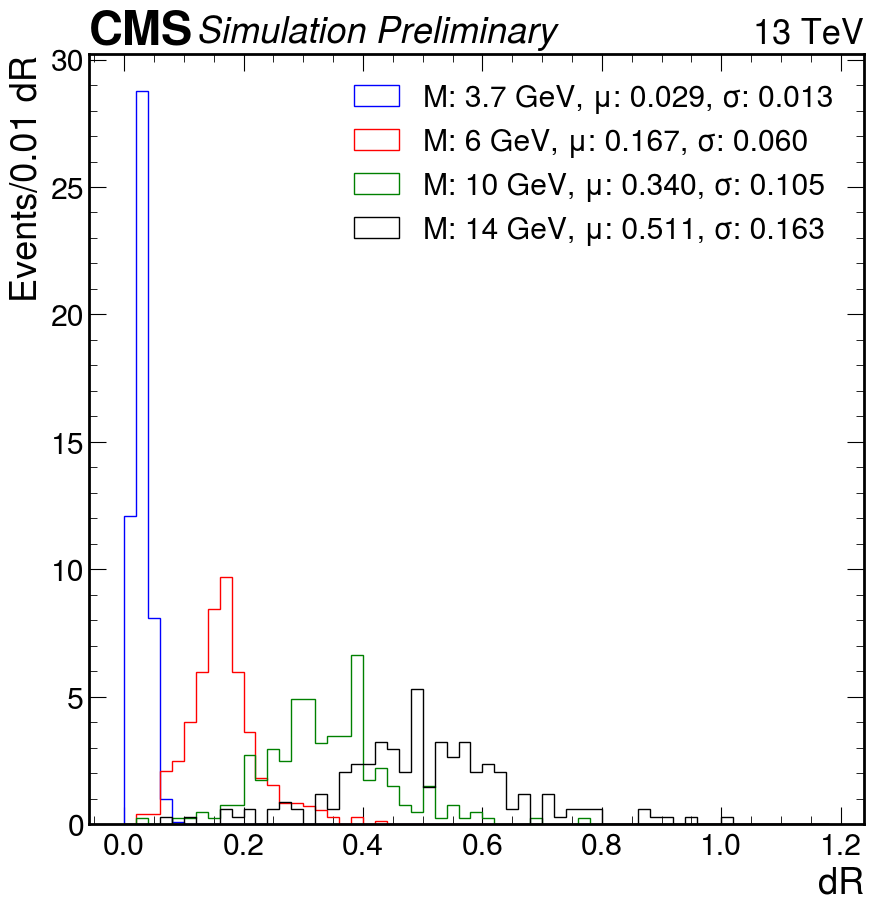

In [106]:
mu = '\u03BC'  # μ
sigma = '\u03C3'  # σ
bins = np.arange(0,1.2, 0.02)
dR_M3p7 = RHTree1.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_M6 = RHTree2.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_M10 = RHTree3.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_M14 = RHTree4.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
fig, ax = plt.subplots()
plt.hist(dR_M3p7,bins=bins,density=True, histtype='step',linestyle='-',linewidth=1, color='b',label=f"M: 3.7 GeV, {mu}: {np.mean(dR_M3p7):.3f}, {sigma}: {np.std(dR_M3p7):.3f}")
plt.hist(dR_M6,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='r',label=f"M: 6 GeV, {mu}: {np.mean(dR_M6):.3f}, {sigma}: {np.std(dR_M6):.3f}")
plt.hist(dR_M10,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='g',label=f"M: 10 GeV, {mu}: {np.mean(dR_M10):.3f}, {sigma}: {np.std(dR_M10):.3f}")
plt.hist(dR_M14,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='k',label=f"M: 14 GeV, {mu}: {np.mean(dR_M14):.3f}, {sigma}: {np.std(dR_M14):.3f}")
# plt.xticks(np.arange(0,1,.1))
plt.legend()
plt.ylabel("Events/0.01 dR")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

### dR Tau Tau combined

In [98]:
np.max(dR_M14_2)

1.2600843

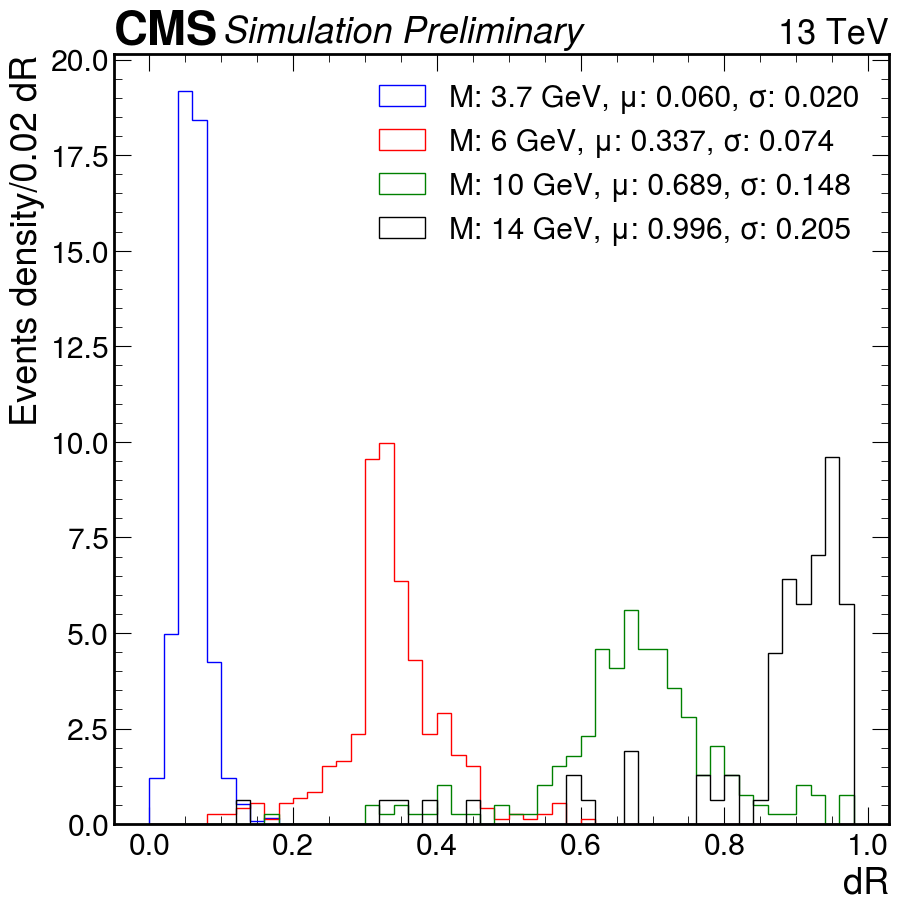

In [102]:
dR_M3p7_1 = RHTree1.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_M6_1 = RHTree2.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_M10_1 = RHTree3.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_M14_1 = RHTree4.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_M3p7_2 = RHTree1.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_M6_2 = RHTree2.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_M10_2 = RHTree3.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_M14_2 = RHTree4.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']

dR_M3p7 = dR_M3p7_1 + dR_M3p7_2
dR_M6 = dR_M6_1 + dR_M6_2
dR_M10 = dR_M10_1 + dR_M10_2
dR_M14 = dR_M14_1 + dR_M14_2

bins = np.arange(0,1,0.02)
fig, ax = plt.subplots()
plt.hist(dR_M3p7,bins=bins,density=True, histtype='step',linestyle='-',linewidth=1, color='b',label=f"M: 3.7 GeV, {mu}: {np.mean(dR_M3p7):.3f}, {sigma}: {np.std(dR_M3p7):.3f}")
plt.hist(dR_M6,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='r',label=f"M: 6 GeV, {mu}: {np.mean(dR_M6):.3f}, {sigma}: {np.std(dR_M6):.3f}")
plt.hist(dR_M10,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='g',label=f"M: 10 GeV, {mu}: {np.mean(dR_M10):.3f}, {sigma}: {np.std(dR_M10):.3f}")
plt.hist(dR_M14,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='k',label=f"M: 14 GeV, {mu}: {np.mean(dR_M14):.3f}, {sigma}: {np.std(dR_M14):.3f}")
# plt.xticks(np.arange(0,1.6,.1))
plt.legend()
plt.ylabel("Events density/0.02 dR")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

### dR A1 A2



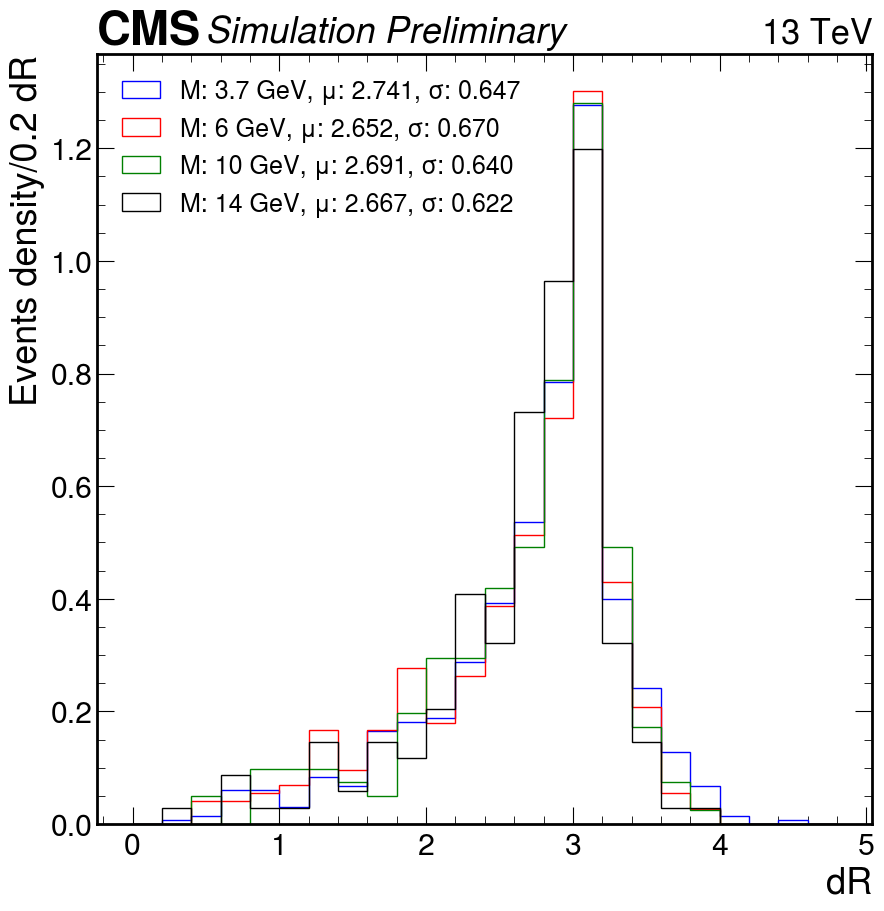

In [16]:
mu = '\u03BC'  # μ
sigma = '\u03C3'  # σ
bins = np.arange(0,5, 0.2)
dR_M3p7 = RHTree1.arrays(["dR_A1_A2"],"dR_A1_A2 > -111",library="pd")['dR_A1_A2']
dR_M6 = RHTree2.arrays(["dR_A1_A2"],"dR_A1_A2 > -111",library="pd")['dR_A1_A2']
dR_M10 = RHTree3.arrays(["dR_A1_A2"],"dR_A1_A2 > -111",library="pd")['dR_A1_A2']
dR_M14 = RHTree4.arrays(["dR_A1_A2"],"dR_A1_A2 > -111",library="pd")['dR_A1_A2']
fig, ax = plt.subplots()
plt.hist(dR_M3p7,bins=bins,density=True, histtype='step',linestyle='-',linewidth=1, color='b',label=f"M: 3.7 GeV, {mu}: {np.mean(dR_M3p7):.3f}, {sigma}: {np.std(dR_M3p7):.3f}")
plt.hist(dR_M6,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='r',label=f"M: 6 GeV, {mu}: {np.mean(dR_M6):.3f}, {sigma}: {np.std(dR_M6):.3f}")
plt.hist(dR_M10,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='g',label=f"M: 10 GeV, {mu}: {np.mean(dR_M10):.3f}, {sigma}: {np.std(dR_M10):.3f}")
plt.hist(dR_M14,bins=bins,density=True,histtype='step',linestyle='-',linewidth=1, color='k',label=f"M: 14 GeV, {mu}: {np.mean(dR_M14):.3f}, {sigma}: {np.std(dR_M14):.3f}")
# plt.xticks(np.arange(0,1,.1))
plt.legend(loc='upper left', fontsize='x-small')
plt.ylabel("Events density/0.2 dR")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()